<a href="https://colab.research.google.com/github/jacobdwatters/Machine-Learning-Basics/blob/main/logistic_regression/02_logistic_regression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Logistic Regression With scikit-learn

---

#### Imports and Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

---

## 1: Data Exploration and Analysis 

---

#### Loding the Dataset

In [3]:
# Load the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

print('Features type:', type(X))
print('Features shape:', X.shape)
print('Targets type:', type(y))
print('Targets shape:',y.shape)

Features type: <class 'numpy.ndarray'>
Features shape: (70000, 784)
Targets type: <class 'numpy.ndarray'>
Targets shape: (70000,)


#### Split Dataset Into Training and Testing Dataset

In [4]:
X_train_base, X_test_base, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

print('Dataset shapes\n' + 20*'-')
print('x_train:', X_train_base.shape)
print('x_train:', y_train.shape)
print('X_test:', X_test_base.shape)
print('y_test:', y_test.shape)

Dataset shapes
--------------------
x_train: (21000, 784)
x_train: (21000,)
X_test: (49000, 784)
y_test: (49000,)


#### Normalize / Standardize the Data

In [5]:
print("Training data min/max:", np.min(X_train_base), "/", np.max(X_train_base))
print("Testing data min/max:", np.min(X_test_base), "/", np.max(X_test_base))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_base)
X_test = scaler.transform(X_test_base)

print("Standardized training data min/max:", np.min(X_train), " / ", np.max(X_train))
print("Standardized testing data min/max:", np.min(X_test), " / ", np.max(X_test))

Training data min/max: 0.0 / 255.0
Testing data min/max: 0.0 / 255.0
Standardized training data min/max: -1.2893535863835988  /  144.91031709309377
Standardized testing data min/max: -1.2893535863835988  /  2898.337457437873


#### Exploring the Data

In [ ]:
data = pd.DataFrame(X)

data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: float64(784)
memory usage: 418.7 MB


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
data_y = pd.DataFrame(y.astype(int))
data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       70000 non-null  int64
dtypes: int64(1)
memory usage: 547.0 KB


In [ ]:
data_y.describe()

,0
count,70000.000000
mean,4.452429
std,2.890195
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb0c78a590>]],
      dtype=object)

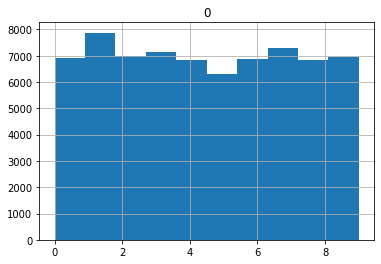

In [ ]:
data_y.hist()

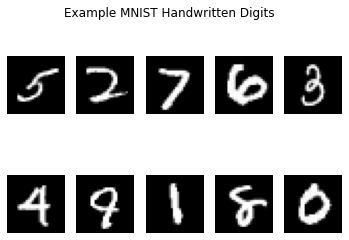

In [6]:
# Plot some example images
img_indices = [35, 530, 4000, 9000, 15008, 34000, 19120, 200, 312, 60003]
image_shapes = (28, 28)

for i, img_index in enumerate(img_indices):
  mnist_examples = plt.subplot(2, 5, i+1)
  mnist_examples.imshow(X[img_index].reshape(image_shapes), cmap='gray')
  mnist_examples.axis('off')
  mnist_examples.set_xlabel('Class %s' % y[img_index])

plt.suptitle('Example MNIST Handwritten Digits')
plt.show()

---

## 2: Define and Fit Logistic Regression Model

---

In [7]:
# Define the model
log_reg = LogisticRegression(penalty="l1", solver="saga", 
                             tol=0.01, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga', tol=0.01)

## Model Visualization

It would be nice to visulaize the model to gain some insight on how it is classifying each hand-written digit. However, the input to our model is a 784 dimensional vector and the output is a 10 dimensional vector. How can we possibly visulaize this?

Remember, our model is really a softmax regression model since the data has 10 classes. The softmax function is then given by 

$$ P(y_i=k \, | \, x_i; \theta) = \cfrac{exp(\theta_k^T x_i)}{\sum_{j=1}^{10}exp(\theta_j^T x_i)}$$

Notice that there is one weight vector $\theta_k$ in the model for each class $k=1, 2, \cdots, 10$. Each one of these weight vectors must have the same number of entries as the number of entries in $x$ (we are ignoring bias terms here). So, the shape of each $\theta_k$ will be $(1, 784)$.

This means that each weight in some $\theta_k$ will correspond to one pixel in the input image. So, we can view the weights for each pixel for each class $k=1, 2, \cdots, 10$ by reshapeing the weight vectors to the same shape as theoriginal input images and then dispay them as a heat map.

Logstic regression Weight Shape: (10, 784)


Text(0.5, 0.98, 'Classification vector for...')

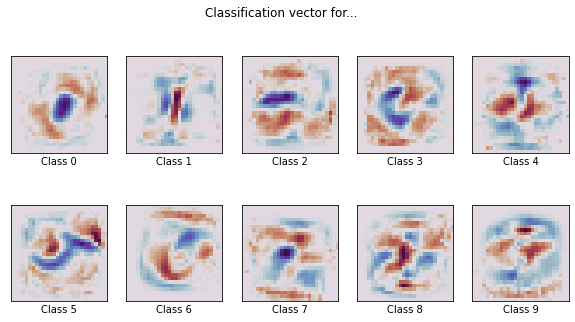

In [9]:
# Get the model parameters/weights. Note, this does not include the bias terms even
# though they were computed in the fit() call. Bias terms are stored in the
# intercept_ array within the model.
coef = log_reg.coef_.copy()
print('Logstic regression Weight Shape:', coef.shape)

plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i+1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        cmap=plt.cm.twilight_shifted,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")